# Cat Task

##








## 

##


## My Libraries

In [60]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import fuzz,process


c:\Users\nemoh\anaconda3\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### Fiqure Size

In [696]:
from matplotlib import rcParams
rcParams['figure.figsize']=(16,6)

## Load Data

In [776]:
df=pd.read_csv('train.csv')
df.head()

,ID,Brand,VehicleModel,ManufacturingYear,Type,rating,color,Duty,fuel,CylinderCount,type of gear,capacity,Odometer,#airbags,price
0,2624,NaN,I have the fastest model ever.. yes you got it...,2017,WOOW Sedan,0.0,NaN,I had to pay a substantial $1249 levy on my ne...,Gas,4.0,R,2.5,75492 KM,1008,21012
1,14392,I love TOYOTA,NaN,NaN,Minivan3,5.0,Metallic,-,Gas,4.0 cyl,R,2.4,220000 KM,-96,11917
2,9822,hyundai,H1,2009,MINIVAN,0.0,Metallic,1185$,Dies,4.0,R,2.5,TOTAL 50653 km,4 count,22433
3,17123,opel,Corsa,NaN,Hatchback,5.0,Jet Black,-,NaN,4.0,auto,0,230000 KM,0,5645
4,11133,subaru,I own Outback.,2007,Hatchback,4.0,Sapphire Blue,-,Gas,4.0,NaN,2.5,131000 KM,4,10976


# Check Info:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 7000 non-null   int64  
 1   Brand              6294 non-null   object 
 2   VehicleModel       6303 non-null   object 
 3   ManufacturingYear  6305 non-null   object 
 4   Type               6315 non-null   object 
 5   rating             6310 non-null   float64
 6   color              4876 non-null   object 
 7   Duty               7000 non-null   object 
 8   fuel               6304 non-null   object 
 9   CylinderCount      7000 non-null   object 
 10  type of gear       6308 non-null   object 
 11  capacity           7000 non-null   object 
 12  Odometer           7000 non-null   object 
 13  #airbags           7000 non-null   object 
 14  price              7000 non-null   int64  
dtypes: float64(1), int64(2), object(12)
memory usage: 820.4+ KB


In [6]:
df.duplicated().sum()

0

In [698]:
df.isna().sum()

ID                      0
Brand                 706
VehicleModel          697
ManufacturingYear     695
Type                  685
rating                690
color                2124
Duty                    0
fuel                  696
CylinderCount           0
type of gear          692
capacity                0
Odometer                0
#airbags                0
price                   0
dtype: int64

In [8]:
df.describe()

,ID,rating,price
count,7000.000000,6310.000000,7000.000000
mean,9022.128714,2.559588,14406.866429
std,5202.316292,1.905482,11747.617978
min,1.000000,-4.000000,3.000000
25%,4546.750000,1.000000,5018.000000
50%,9044.500000,2.000000,12544.000000
75%,13523.250000,4.000000,20071.000000
max,18013.000000,10.000000,49889.000000


In [11]:
df.head()

,ID,Brand,VehicleModel,ManufacturingYear,Type,rating,color,Duty,fuel,CylinderCount,type of gear,capacity,Odometer,#airbags,price
0,2624,NaN,I have the fastest model ever.. yes you got it...,2017,WOOW Sedan,0.0,NaN,I had to pay a substantial $1249 levy on my ne...,Gas,4.0,R,2.5,75492 KM,1008,21012
1,14392,I love TOYOTA,NaN,NaN,Minivan3,5.0,Metallic,-,Gas,4.0 cyl,R,2.4,220000 KM,-96,11917
2,9822,hyundai,H1,2009,MINIVAN,0.0,Metallic,1185$,Dies,4.0,R,2.5,TOTAL 50653 km,4 count,22433
3,17123,opel,Corsa,NaN,Hatchback,5.0,Jet Black,-,NaN,4.0,auto,0,230000 KM,0,5645
4,11133,subaru,I own Outback.,2007,Hatchback,4.0,Sapphire Blue,-,Gas,4.0,NaN,2.5,131000 KM,4,10976


# Data Cleaning

### This is the ['Brand'] Column Before

In [792]:
df['Brand'].unique()

array([nan, 'I love TOYOTA', 'hyundai', 'opel', 'subaru', 'VOLKSWAGEN',
       'FORD', 'Bmw', 'jaguar', 'I love HONDA', 'mercedes-benz',
       'I love FORD', 'honda', 'HYUNDAI', 'NISSAN', 'toyota',
       'volkswagen', 'lexus', 'ford', 'SSANGYONG', 'HONDA', 'Hyundai',
       'Toyota', 'BMW', 'MERCEDES-BENZ is the best',
       'I love MERCEDES-BENZ', 'SSANGYONG is the best', 'I love SUBARU',
       'ssangyong', 'TOYOTA is the best', 'nissan', 'kia', 'DAEWOO',
       'SUBARU is the best', 'TOYOTA', 'bmw', 'AUDI', 'CHEVROLET', 'jeep',
       'SUBARU', 'MERCEDES-BENZ', 'Mercedes-Benz', 'I love BMW', 'LEXUS',
       'I love HYUNDAI', 'NISSAN is the best', 'Opel', 'PORSCHE', 'MAZDA',
       'I love NISSAN', 'HYUNDAI is the best', 'chevrolet', 'mitsubishi',
       'I love KIA', 'Chevrolet', 'mazda', 'KIA', 'BMW is the best',
       'gmc', 'I love LEXUS', 'MITSUBISHI', 'I love MITSUBISHI', 'skoda',
       'Lexus', 'Volkswagen', 'SUZUKI', 'Ford', 'JEEP', 'OPEL', 'Honda',
       'I love VOLKSW

#### Note
 - We found that many brands are mentioned multiple times

In [793]:
df['Brand'].fillna('Unknown',inplace=True)
df['Brand'] = df['Brand'].str.strip().str.upper()
df['Brand']=df['Brand'].str.replace(r'I LOVE ', '', regex=True)
df['Brand']=df['Brand'].str.replace(r'LOVE ', '', regex=True)
df['Brand']=df['Brand'].str.replace(r'IS THE BEST', '', regex=True)
df['Brand']=df['Brand'].str.replace(r' ', '', regex=True)


In [794]:
df['Brand'].unique()

array(['UNKNOWN', 'TOYOTA', 'HYUNDAI', 'OPEL', 'SUBARU', 'VOLKSWAGEN',
       'FORD', 'BMW', 'JAGUAR', 'HONDA', 'MERCEDES-BENZ', 'NISSAN',
       'LEXUS', 'SSANGYONG', 'KIA', 'DAEWOO', 'AUDI', 'CHEVROLET', 'JEEP',
       'PORSCHE', 'MAZDA', 'MITSUBISHI', 'GMC', 'SKODA', 'SUZUKI', 'FIAT',
       'PEUGEOT', 'DODGE', 'MINI', 'VAZ', 'GAZ', 'CADILLAC', 'UAZ',
       'SEAT', 'ROVER', 'CHRYSLER', 'LANDROVER', 'INFINITI', 'ᲡᲮᲕᲐ',
       'ALFAROMEO', 'RENAULT', 'GREATWALL', 'BUICK', 'VOLVO', 'LINCOLN',
       'ISUZU', 'SCION', 'ROLLS-ROYCE', 'CITROEN', 'PONTIAC', 'ACURA',
       'DAIHATSU', 'MOSKVICH', 'MERCURY', 'MASERATI'], dtype=object)

C:\Users\nemoh\AppData\Local\Temp\ipykernel_36960\4036068006.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Brand',data=df,palette='Blues',binrange=[1,15])
c:\Users\nemoh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Brand', ylabel='Count'>

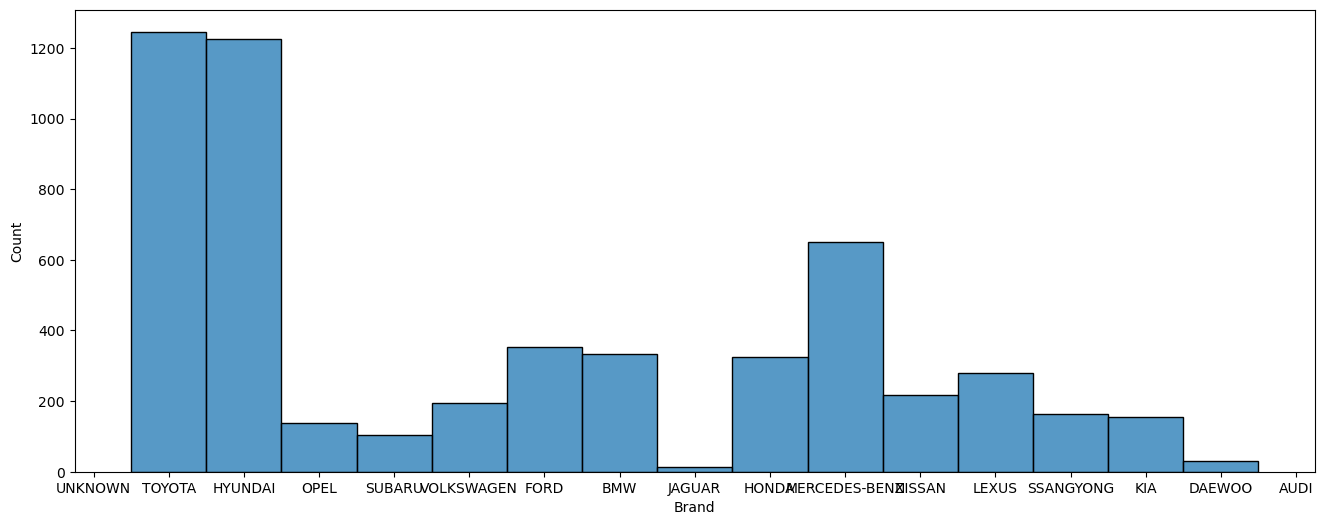

In [702]:
sns.histplot(x='Brand',data=df,palette='Blues',binrange=[1,15])

### ['VehicleModel'] Column

In [795]:
df['VehicleModel'].unique()

array(["I have the fastest model ever.. yes you got it right it's Mazda 6 TOURING",
       nan, 'H1', ..., 'Navigator',
       'my model which is RAV 4 L is the best', 'I own X-type.'],
      dtype=object)

In [796]:
df['VehicleModel'].fillna('Unknown',inplace=True)
df['VehicleModel']=df['VehicleModel'].str.replace("I have the fastest model ever.. yes you got it right it's Mazda 6 TOURING","Mazda 6",regex=True)
df['VehicleModel']=df['VehicleModel'].str.replace("my model which is RAV 4 L is the best"," Rav4 ",regex=True)
df['VehicleModel']=df['VehicleModel'].str.replace('my model which is Touareg is the best','touareg',regex=True)
df['VehicleModel']=df['VehicleModel'].str.replace('I own X-type.','X-Type',regex=True)
df['VehicleModel']=df['VehicleModel'].astype('str')

In [797]:
df['VehicleModel'].unique()

array(['Mazda 6', 'Unknown', 'H1', ..., 'Navigator', ' Rav4 ', 'X-Type'],
      dtype=object)

### ['ManufacturingYear'] Column

In [798]:
df['ManufacturingYear'].unique()

array(['2017', nan, '2009', '2007', '3010', '1999', '2012', '2011',
       '2014', '2015', '2006', '2105', '2013,', '2010', '2017{',
       '1-1-2003', '2016', '1998', '2018', '2008', '2015+', '2012"',
       '2013', '2111', '1-1-2020', '2005', '2017*', '2004', '2016.',
       '2015#', '1910', '2017&', '1914', '1-1-2013', '3009', '2009&',
       '2018}', '14years old', '1-1-2014', '2001', '2015`', '2112',
       '1997', '2014@', '1917', '2014+', '2013*', '1-1-2011', '1-1-2008',
       '2012,', '2003', '1-1-2007', '15years old', '1916', '1-1-2012',
       '1912', '2010~', '2020', '2002>', '2110', '2005>', '2115',
       '1-1-2005', '2009%', '2019', '10years old', '1-1-2002', '2015@',
       '3013', '1907', '2010*', '2000', '1996_', '12years old', '2011;',
       '2017_', '13years old', '3014', '2017(', '2011,', '11years old',
       '7years old', '1-1-2010', '3004', '1996|', '1913', '2014|',
       '1-1-2016', '2016[', '1900', "2009'", '1902', '2117', '1-1-2009',
       '8years old', '2

#### Note
 - We found that many years are mentioned multiple times
 - there are unwanted characters present
 - We will remove the duplicates and clean up the unwanted characters

In [799]:
data=df['ManufacturingYear'].mode()[0]
df['VehicleModel'].fillna(data,inplace=True)
unwanted_chars = r"[{}+@()<>:;!'\"#%&/\[\]|\\^`~$*=?_,.-]"

df['ManufacturingYear'] = df['ManufacturingYear'].str.replace(unwanted_chars, "", regex=True)
df['ManufacturingYear'] = df['ManufacturingYear'].str.replace("years old" , "", regex=True)
df['ManufacturingYear'] = df['ManufacturingYear'].str.replace('1-1-' ,'', regex=True)
df['ManufacturingYear'] = df['ManufacturingYear'].str.replace('nan' ,'2012', regex=True)


In [800]:
df['ManufacturingYear'] = pd.to_numeric(df['ManufacturingYear'], errors='coerce')

df['ManufacturingYear']=df['ManufacturingYear'].astype(float)
df.dropna(subset=['ManufacturingYear'], inplace=True)
df = df[(df['ManufacturingYear'] <= 2024) & (df['ManufacturingYear'] >= 1980)]

In [801]:
df['ManufacturingYear'].unique()


array([2017., 2009., 2007., 1999., 2012., 2011., 2014., 2015., 2006.,
       2013., 2010., 2016., 1998., 2018., 2008., 2005., 2004., 2001.,
       1997., 2003., 2020., 2002., 2019., 2000., 1996., 1995., 1985.,
       1983., 1992., 1993., 1994., 1988., 1982., 1987., 1991., 1990.,
       1986., 1984.])

C:\Users\nemoh\AppData\Local\Temp\ipykernel_36960\4016211485.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='ManufacturingYear',data=df,palette='Blues')
c:\Users\nemoh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ManufacturingYear', ylabel='Count'>

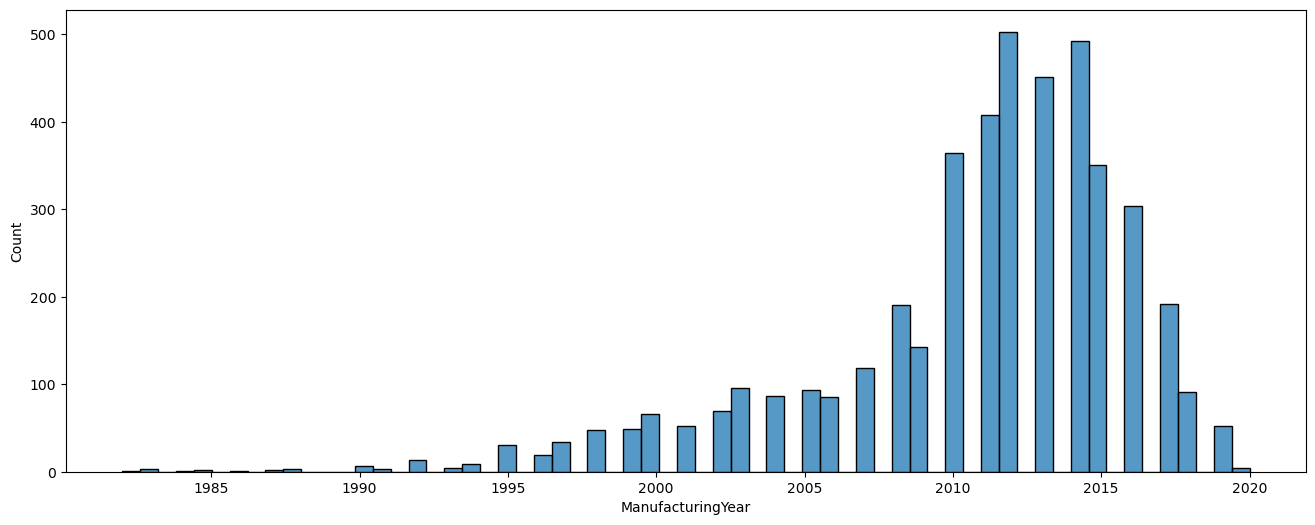

In [802]:
sns.histplot(x='ManufacturingYear',data=df,palette='Blues')

### ['Type'] Column 

In [803]:
df['Type'].unique()

array(['WOOW Sedan', 'MINIVAN', 'Hatchback', 'SEDAN', 'Pickup3', 'jeep',
       'Minivan', 'sedan', 'HATCHBACK', 'hatchback', 'JEEP', 'microbus',
       nan, 'Jeep1', 'Sedan0', 'Coupe', 'Hatchback3', 'Sedan', 'Sedan3',
       'WOOW Hatchback', 'WOOW Jeep', 'Hatchback1', 'minivan',
       'WOOW Coupe', 'Hatchback2', 'Jeep2', 'Hatchback4', 'Sedan4',
       'Sedan1', 'Jeep', 'WOOW Minivan', 'Jeep4', 'universal',
       'WOOW Goods wagon', 'UNIVERSAL', 'MICROBUS', 'Minivan0', 'Coupe1',
       'pickup', 'Sedan2', 'Jeep3', 'coupe', 'COUPE', 'Jeep0',
       'goods wagon', 'Microbus', 'WOOW Universal', 'Goods wagon1',
       'Minivan2', 'Universal', 'WOOW Microbus', 'Microbus4', 'Coupe3',
       'Goods wagon4', 'Goods Wagon', 'PICKUP', 'Coupe0', 'Hatchback0',
       'Goods wagon3', 'Universal3', 'Minivan1', 'GOODS WAGON',
       'Universal0', 'cabriolet', 'Microbus1', 'Microbus0', 'limousine',
       'Microbus3', 'Coupe2', 'Minivan4', 'Coupe4', 'Minivan3', 'Pickup0',
       'Pickup'], dtype=ob

#### Note
- There are many types of cars that are repeated.

In [806]:
df['Type'].fillna('Unknown',inplace=True)
df['Type'] = df['Type'].str.strip().str.upper()
df['Type']=df['Type'].str.replace(r'WOOW', '', regex=True)
df['Type']=df['Type'].str.replace(r'3', '', regex=True)
df['Type']=df['Type'].str.replace(r'GOODS', '', regex=True)
df['Type']=df['Type'].str.replace(r'2', '', regex=True)
df['Type']=df['Type'].str.replace(r'1', '', regex=True)
df['Type']=df['Type'].str.replace(r'4', '', regex=True)
df['Type']=df['Type'].str.replace(r'0', '', regex=True)


In [807]:
df['Type'].unique()

array(['SEDAN', 'MINIVAN', 'HATCHBACK', 'PICKUP', 'JEEP', 'MICROBUS',
       'UNKNOWN', 'COUPE', 'UNIVERSAL', 'WAGON', 'CABRIOLET', 'LIMOUSINE'],
      dtype=object)

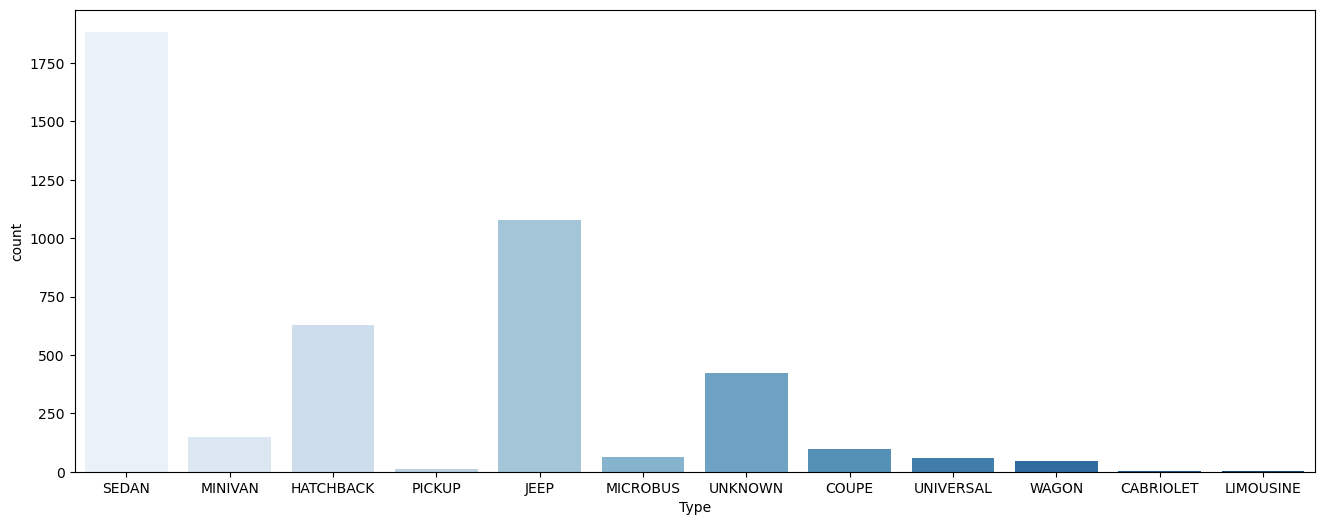

In [808]:
sns.countplot(x='Type',data=df,palette='Blues')
plt.show()


#### Note
- We note that SEDAN is the most common type of car.


### ["rating"] Column

In [809]:
df["rating"].unique()

array([ 0.,  4.,  2.,  6.,  3.,  8.,  1., nan,  5., -1., -2.,  7., -3.,
        9., 10., -4.])

#### Note 
- We will remove NaN values.
- We will remove negative rates.

In [810]:
df["rating"].unique()
impute=int(np.round(df['rating'].mean()))
df["rating"].fillna(impute,inplace=True)
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df = df[df['rating'] >= 0]


In [811]:
df["rating"].unique()


array([ 0.,  4.,  2.,  6.,  3.,  8.,  1.,  5.,  7.,  9., 10.])

<Axes: xlabel='rating', ylabel='count'>

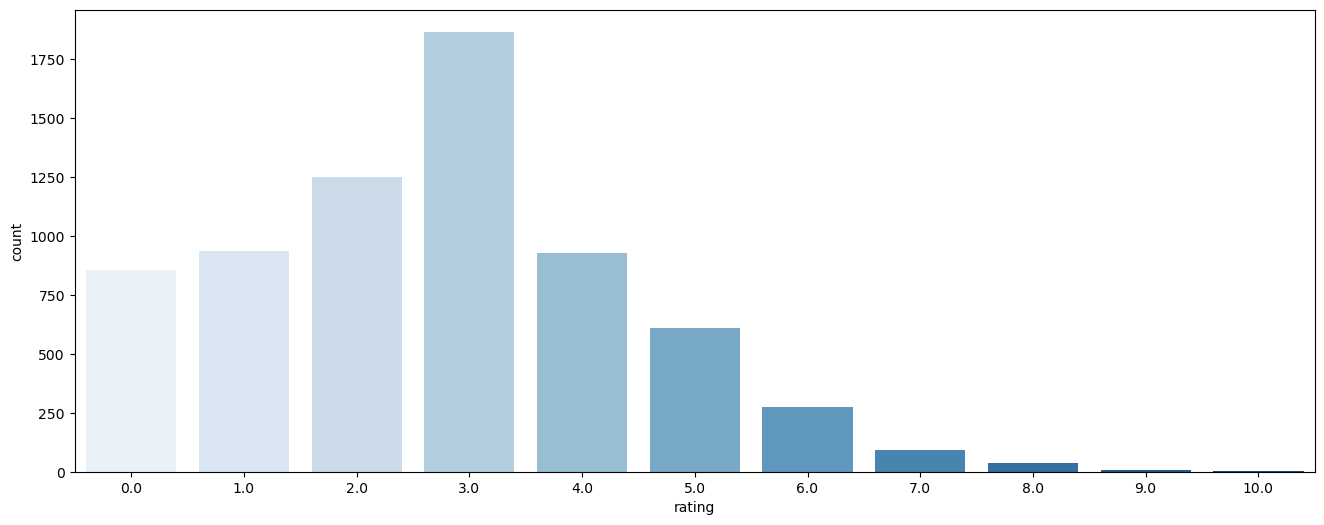

In [355]:
sns.countplot(x='rating',data=df,palette='Blues')


### ['color'] Column

In [812]:
df.fillna('Unknown',inplace=True)
df['color'].unique()


array(['Unknown', 'Metallic', 'Sapphire Blue', 'Pearl White', 'Jet Black',
       'Gold', 'Charcoal', 'Crimson', 'Sand', 'Emerald Green',
       'Lemon Yellow', 'Tangerine', 'Sky Blue', 'Chocolate', 'Rose Pink',
       'Royal Purple', 'Ruby Red'], dtype=object)

<Axes: xlabel='color', ylabel='count'>

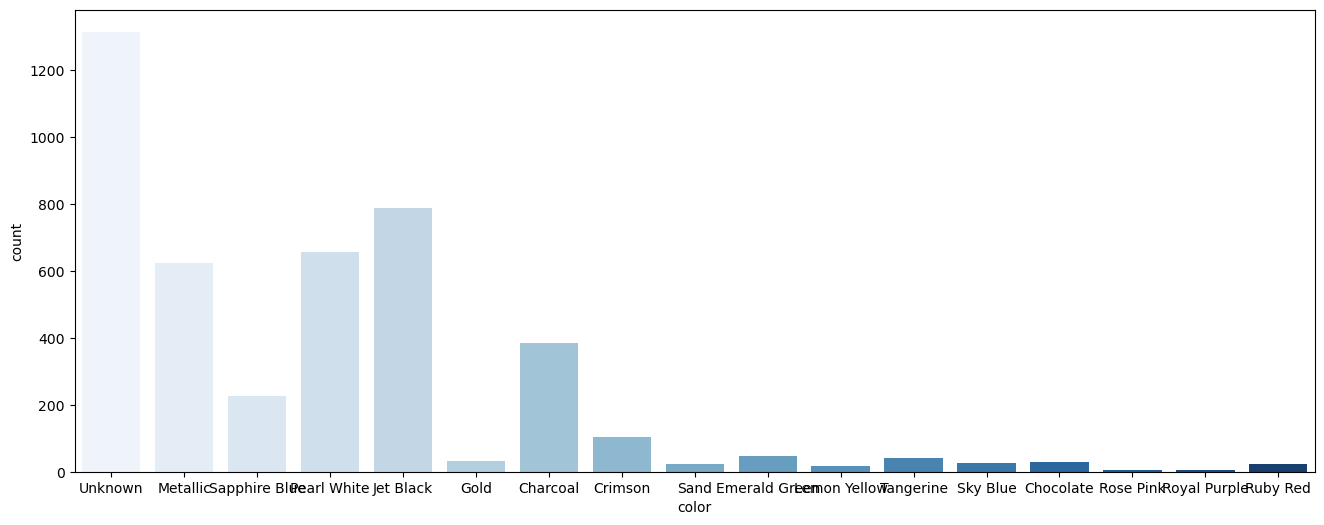

In [813]:
sns.countplot(x='color',data=df,palette='Blues')


### ['Duty'] Column

In [814]:
df['Duty'].unique()

array(['I had to pay a substantial $1249 levy on my new car purchase.',
       '1185$', '-', '-8526', '10777', '1104$',
       'I had to pay a substantial $640 levy on my new car purchase.',
       '`', '10891', '603 pound', '880', '893 pound', '503', '~', '779$',
       '707$', 'The car levy amounted is 781 per vehicle.', '640', '691',
       '891', '831$', '779', '1829', '1750', '870',
       'The car levy amounted is 790 per vehicle.', '1327$', '629',
       '586 pound', '595', '/', '1018$', '10394',
       'The car levy amounted is 639 per vehicle.', '-8945', '761$',
       '988', '1058 pound', '1172', '781$', '!', '1399', '1076', '-9606',
       '419', '1249 pound', '-4321', '%', '1246$', '1018', '502$',
       'The car levy amounted is 1172 per vehicle.', '753 pound', '1077$',
       '781 pound', '843 pound', '730$', '777', '765 pound', '1850 pound',
       '645 pound', '1053', '1324$', '501 pound', '836 pound', '1030',
       '784', '831', '707', '11024', '640$', '777$', '891$',

In [815]:

df.fillna('NO DUTY',inplace=True)
unwanted_chars = r"[{}+@()<>:;!'\"#%&/\[\]|\\^`~$*=?_,.-]"
unwanted_strings=r"\bI had to pay a substantial\b|\blevy on my new car purchase\b|\bpound\b|\bThe car levy amounted is\b|\bper vehicle\b|\bWe were surprised by the hefty\b|\blevy on imported cars\b|\bNo Duty\b"

df['Duty'] = df['Duty'].str.replace(unwanted_chars, "", regex=True)
df['Duty'] = df['Duty'].str.replace(unwanted_strings, "", regex=True)
df['Duty'] = df['Duty'].str.replace(r'T893', '893', regex=True)

In [816]:
df['Duty'].unique()

array([' 1249 ', '1185', '', '8526', '10777', '1104', ' 640 ', '10891',
       '603 ', '880', '893 ', '503', '779', '707', ' 781 ', '640', '691',
       '891', '831', '1829', '1750', '870', ' 790 ', '1327', '629',
       '586 ', '595', '1018', '10394', ' 639 ', '8945', '761', '988',
       '1058 ', '1172', '781', '1399', '1076', '9606', '419', '1249 ',
       '4321', '1246', '502', ' 1172 ', '753 ', '1077', '781 ', '843 ',
       '730', '777', '765 ', '1850 ', '645 ', '1053', '1324', '501 ',
       '836 ', '1030', '784', '11024', '333 ', ' 2297 ', '765', '586',
       '584', '3156 ', '2108', '843', '9355', '425', '1079 ', '1451',
       '585 ', ' 777 ', '441', '639 ', '1811', '831 ', '308', '583',
       '1357', '642', '521', '2455', ' 779 ', '1051', '761 ', '382',
       '862', '11325', ' 289 ', '1190 ', ' 746 ', ' 1185 ', '585',
       ' 1091 ', '333', '473', '574', '528', '629 ', '1080 ', ' 1266 ',
       '1750 ', '934', '1249', '919', '9166', '1079', '1578', '639',
       '779 ', '

### ['fuel'] Column

<Axes: xlabel='fuel', ylabel='count'>

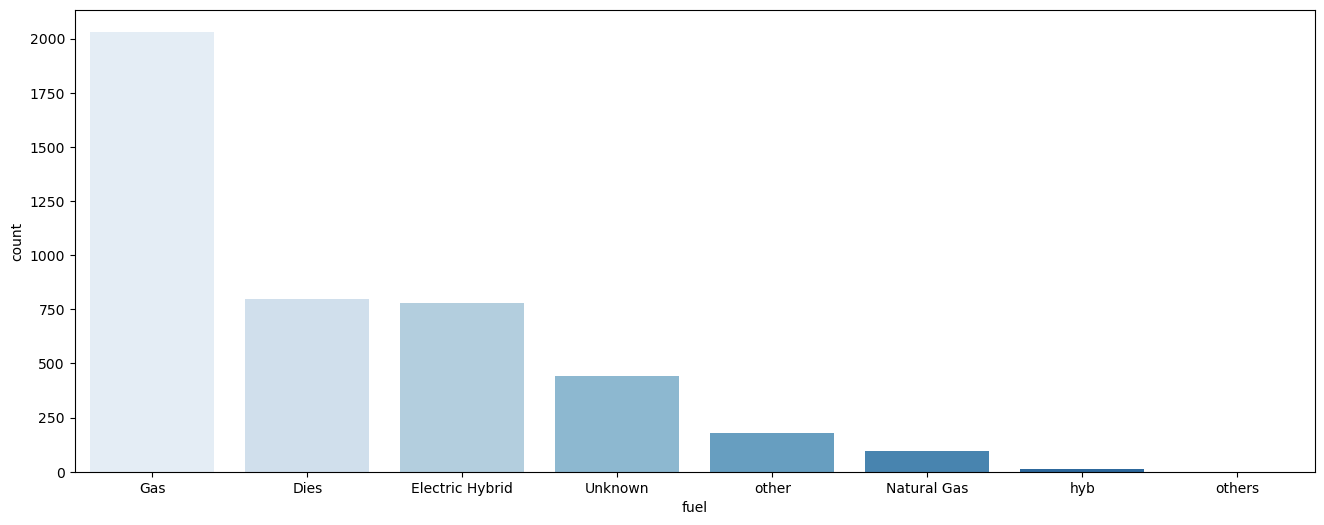

In [817]:
sns.countplot(x='fuel',data=df,palette='Blues')


### Note 
- We found that there are "Hyb," "Electric Hybrid," "Other," and "Others."
- Its name, "Dies," refers to diesel fuel

In [818]:
df['fuel'].unique()

array(['Gas', 'Dies', 'Electric Hybrid', 'Unknown', 'other',
       'Natural Gas', 'hyb', 'others'], dtype=object)

In [819]:
impute=df['fuel'].mode()[0]
df.fillna(impute,inplace=True)
df['fuel']=df['fuel'].str.replace(r'others','other',regex=True)
df['fuel']=df['fuel'].str.replace(r'Dies','Diesel fuel',regex=True)
df['fuel']=df['fuel'].str.replace(r'hyb','Electric Hybrid',regex=True)

<Axes: xlabel='fuel', ylabel='count'>

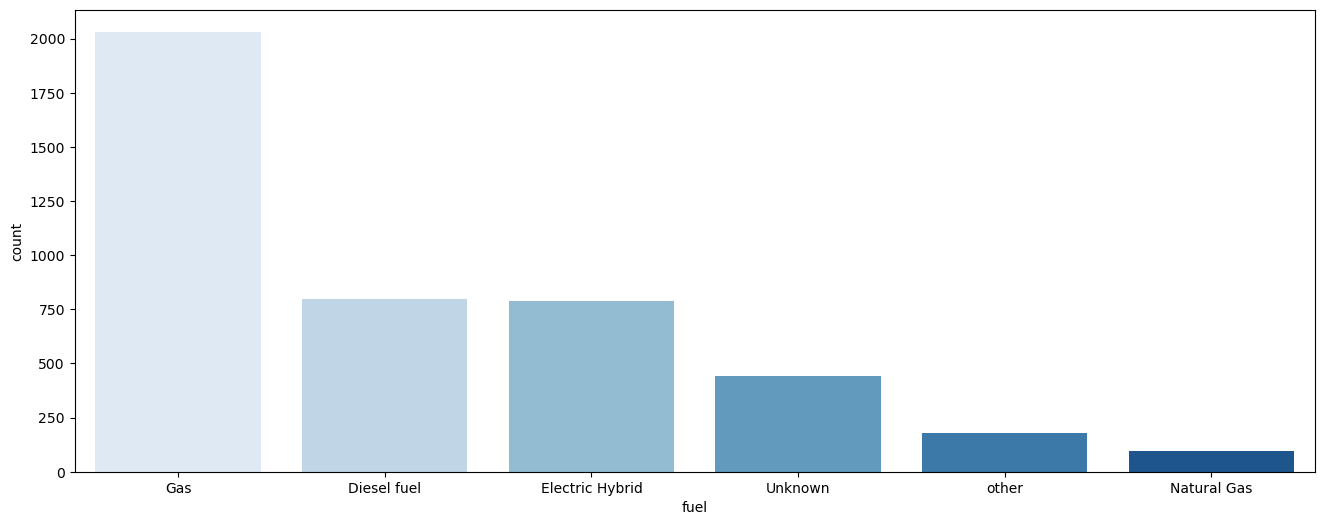

In [820]:
sns.countplot(x='fuel',data=df,palette='Blues')


### Note 
- The most Used fuel is 'Gas'

#### ['CylinderCount'] Column

C:\Users\nemoh\AppData\Local\Temp\ipykernel_36960\342262645.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='CylinderCount',data=df,palette='Blues')
c:\Users\nemoh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CylinderCount', ylabel='Count'>

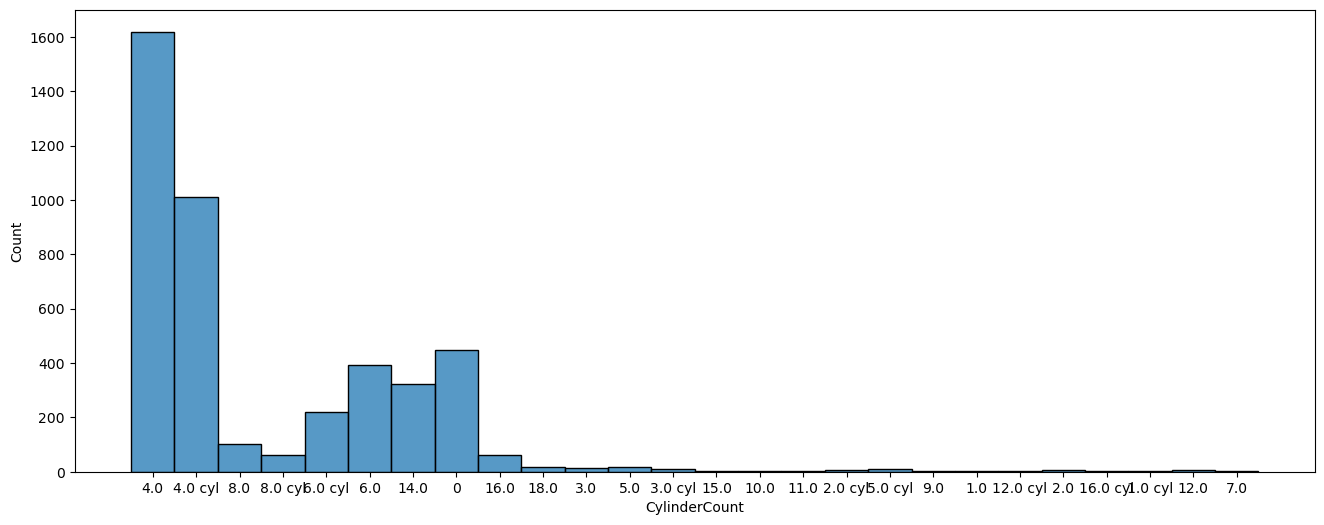

In [821]:
sns.histplot(x='CylinderCount',data=df,palette='Blues')

In [822]:

df['CylinderCount']=df['CylinderCount'].str.replace(r'cyl','',regex=True)



df['CylinderCount'] = df['CylinderCount'].astype(str)

impute=df['CylinderCount'].mode()[0]
df['CylinderCount'].fillna(impute,inplace=True)

C:\Users\nemoh\AppData\Local\Temp\ipykernel_36960\389569186.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='CylinderCount',data=df,palette='Blues')
c:\Users\nemoh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CylinderCount', ylabel='Count'>

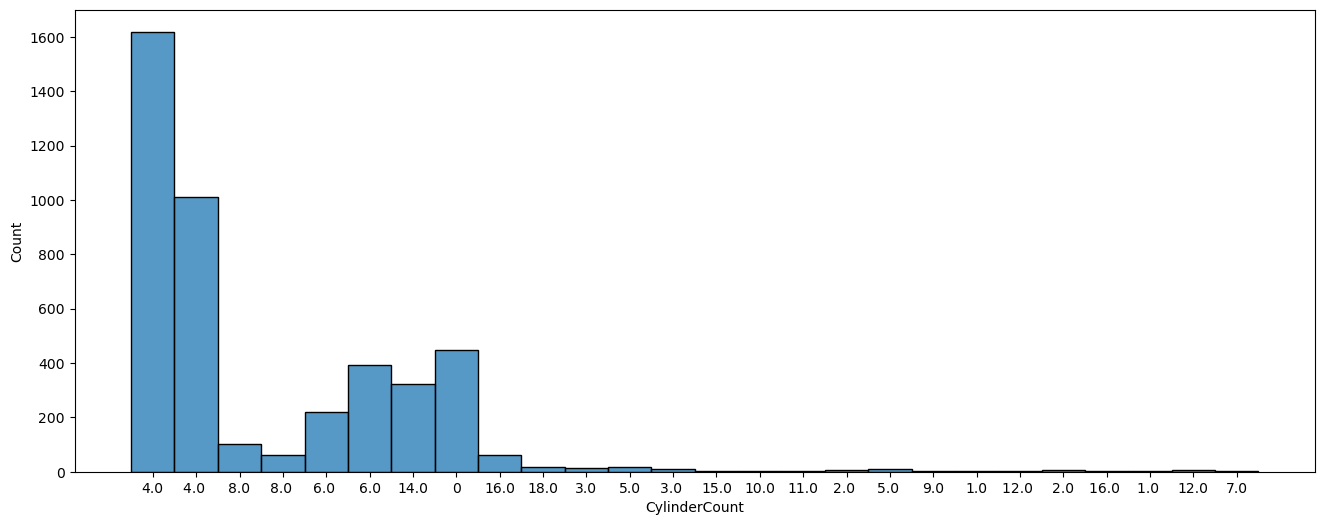

In [823]:
sns.histplot(x='CylinderCount',data=df,palette='Blues')


### ['type of gear'] Column

C:\Users\nemoh\AppData\Local\Temp\ipykernel_36960\2565006980.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='type of gear',data=df,palette='Blues')
c:\Users\nemoh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='type of gear', ylabel='Count'>

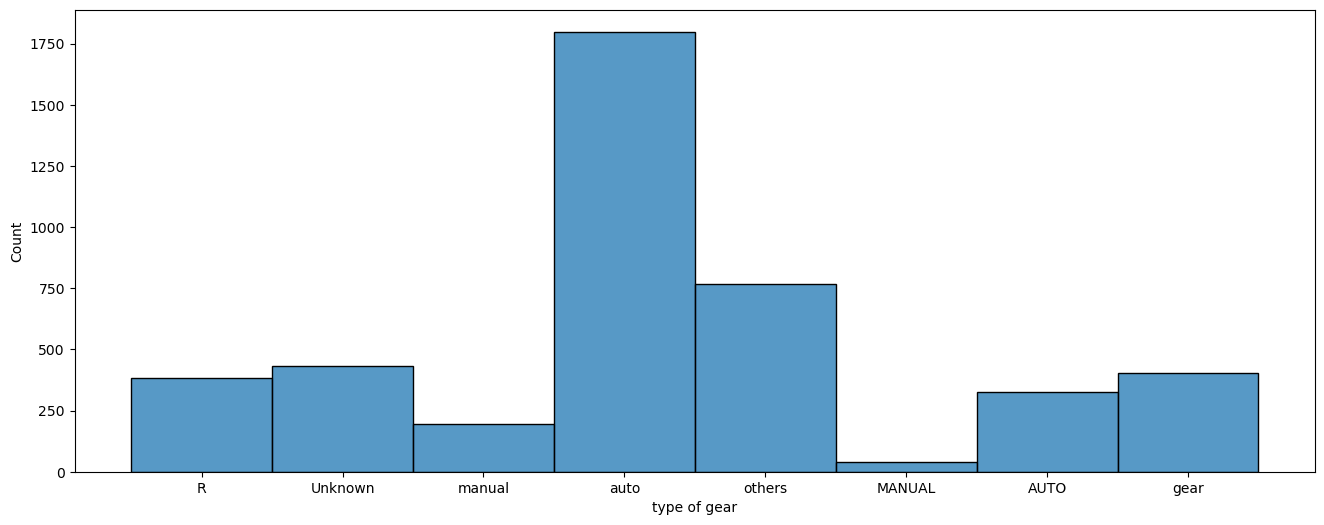

In [824]:
sns.histplot(x='type of gear',data=df,palette='Blues')


#### Note 
- The data contains two instances of "auto" and two instances of "manual.

In [825]:
df['type of gear']=df['type of gear'].str.strip().str.lower()
mode=df['type of gear'].mode()[0]
df['type of gear'].fillna(mode,inplace=True)
df['type of gear']=df['type of gear'].str.replace(r'\br\b',mode,regex=True)
df['type of gear']=df['type of gear'].str.replace(r'\bgear\b',mode,regex=True)
df['type of gear']=df['type of gear'].str.replace(r'\bothers\b',mode,regex=True)
df['type of gear']=df['type of gear'].str.replace(r'\bunknown\b',mode,regex=True)

C:\Users\nemoh\AppData\Local\Temp\ipykernel_36960\2565006980.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='type of gear',data=df,palette='Blues')
c:\Users\nemoh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='type of gear', ylabel='Count'>

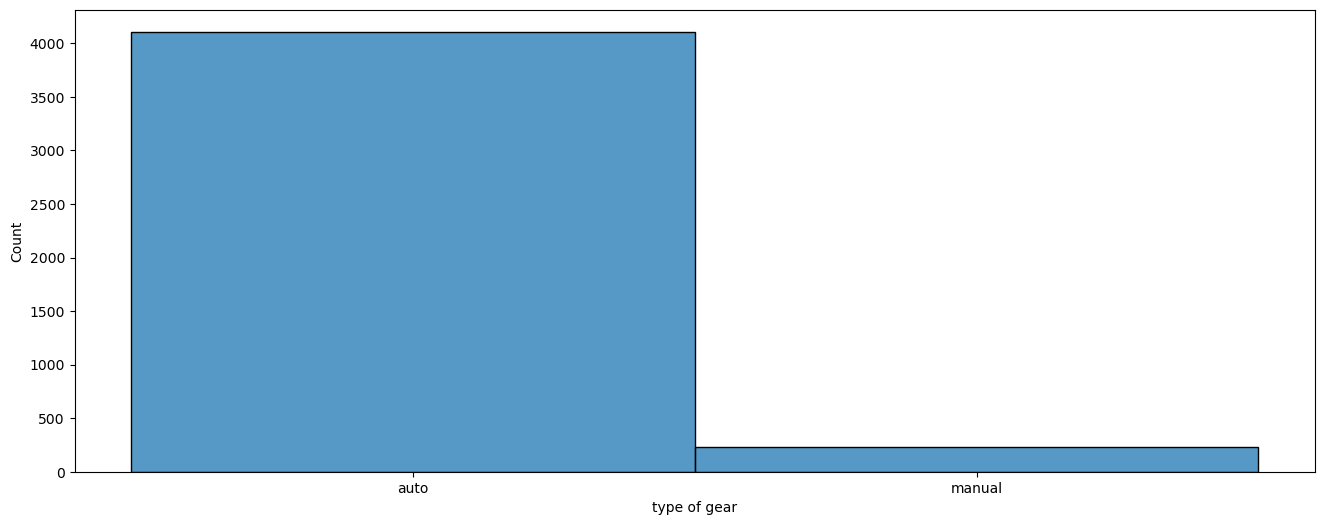

In [826]:
sns.histplot(x='type of gear',data=df,palette='Blues')


#### Note
- We Found that auto is the most gear

### ['capacity'] Column

In [827]:
df['capacity'].unique()

array(['2.5', '2', '5', '0', '3', '1.3', '1.5', '1.6', '3.5', '1.8 Turbo',
       '2.4', '2.5 Turbo', '3.3', '1.7', '2.2', '2.2 Turbo', '1.8', '1.4',
       '4.8', '1.2', '2.3', '1.6 Turbo', '2.8 Turbo', '3.2', '5.5', '4.7',
       '6.2', '4.6', '1', '3.0 Turbo', '4', '2.0 Turbo', '2.7',
       '2.4 Turbo', '5.0 Turbo', '3.6', '4.4', '1.4 Turbo', '2.6',
       '3.2 Turbo', '0.6 Turbo', '1.5 Turbo', '6.3', '3.8', '1.9', '3.7',
       '1.9 Turbo', '5.9', '0.3', '4.5 Turbo', '5.7', '4.2', '3.5 Turbo',
       '0.4', '0.1', '0.2', '0.8', '4.4 Turbo', '2.3 Turbo', '4.7 Turbo',
       '1.7 Turbo', '6.7', '2.7 Turbo', '2.9', '2.8', '0.7', '2.1',
       '2.9 Turbo', '5.4', '5.4 Turbo', '3.4', '4.3', '0.9', '1.3 Turbo',
       '3.6 Turbo', '1.0 Turbo', '0.6', '5.2', '1.1'], dtype=object)

In [829]:
df['capacity']=df['capacity'].str.replace(r'Turbo','',regex=True)
df['capacity'].unique()

array(['2.5', '2', '5', '0', '3', '1.3', '1.5', '1.6', '3.5', '1.8 ',
       '2.4', '2.5 ', '3.3', '1.7', '2.2', '2.2 ', '1.8', '1.4', '4.8',
       '1.2', '2.3', '1.6 ', '2.8 ', '3.2', '5.5', '4.7', '6.2', '4.6',
       '1', '3.0 ', '4', '2.0 ', '2.7', '2.4 ', '5.0 ', '3.6', '4.4',
       '1.4 ', '2.6', '3.2 ', '0.6 ', '1.5 ', '6.3', '3.8', '1.9', '3.7',
       '1.9 ', '5.9', '0.3', '4.5 ', '5.7', '4.2', '3.5 ', '0.4', '0.1',
       '0.2', '0.8', '4.4 ', '2.3 ', '4.7 ', '1.7 ', '6.7', '2.7 ', '2.9',
       '2.8', '0.7', '2.1', '2.9 ', '5.4', '5.4 ', '3.4', '4.3', '0.9',
       '1.3 ', '3.6 ', '1.0 ', '0.6', '5.2', '1.1'], dtype=object)

### ['Odometer'] column

In [830]:
df['Odometer'].unique()

array(['75492 ', '50653', '131000 ', ..., '162000  kilometer', '88300',
       '451117'], dtype=object)

In [831]:
unwanted_strings2=r"\b km\b|\bTOTAL \b|\b  kilo\b|\bKM\b"

df['Odometer'] = df['Odometer'].str.replace(unwanted_strings2,'', regex=True)

In [832]:
df['Odometer'].unique()

array(['75492 ', '50653', '131000 ', ..., '162000  kilometer', '88300',
       '451117'], dtype=object)

### ['#airbags'] column

In [833]:
df['#airbags'].unique()

array(['1008', '4', '6', '8', '12', '106', '0', '10', '1012', '5', '2',
       '108', '94', '88', '112', '11', '110', '1005', '16', '1', '100',
       '96', '1004', '9', '14', '98', '7', '1002', '1000', '104', '105',
       '92', '1010', '1007', '116', '90', '3', '102', '99', '1006', '13',
       '15', '111', '107'], dtype=object)

### Note 
- There is a lot of Unwanted chars and strings

In [790]:
unwanted_chars = r"[{}+@()<>:;!'\"#%&/\[\]|\\^`~$*=?_,.-]"
unwanted_strings=r"\bONLY\b|\bAIRBAG\b|\bbags\b|\bcount\b"
df['#airbags'] = df['#airbags'].str.replace(unwanted_chars, "", regex=True)
df['#airbags'] = df['#airbags'].str.replace(unwanted_strings, "", regex=True)
df['#airbags'] = df['#airbags'].str.strip()

In [791]:
df['#airbags'].unique()

array(['1008', '96', '4', '0', '12', '6', '8', '106', '2', '10', '1012',
       '5', '100', '108', '94', '88', '112', '11', '110', '104', '1005',
       '16', '1', '92', '1004', '9', '14', '90', '13', '98', '7', '1002',
       '1000', '105', '1010', '1007', '116', '3', '102', '99', '1006',
       '1016', '15', '101', '111', '97', '107', '109', '95'], dtype=object)

# Bivariate Analysis

In [666]:
def numerical_vs_numerical(col1,col2,data):
    sns.scatterplot(x=col1,y=col2,data=df)
    plt.title(f'scatter of {col1} vs {col2}')
    plt.show()
    corr = df[[col1, col2]].corr().iloc[0, 1]
    print(f'Correlation between {col1} and {col2}: {corr:.2f}')
def numerical_vs_categorical(cat_col, num_col,data):
    sns.boxplot(x=cat_col, y=num_col, data=df)
    plt.xticks(rotation=90)
    plt.title(f'Box Plot of {num_col} by {cat_col}')
    plt.show()
def categorical_vs_categorical(cat_col1,cat_col2,data):
    crosstab = pd.crosstab(df[cat_col1], df[cat_col2])
    crosstab.plot(kind='bar', stacked=True)
    plt.title(f'Stacked Bar Plot of {cat_col1} vs {cat_col2}')
    plt.xticks(rotation=90)
    plt.show()


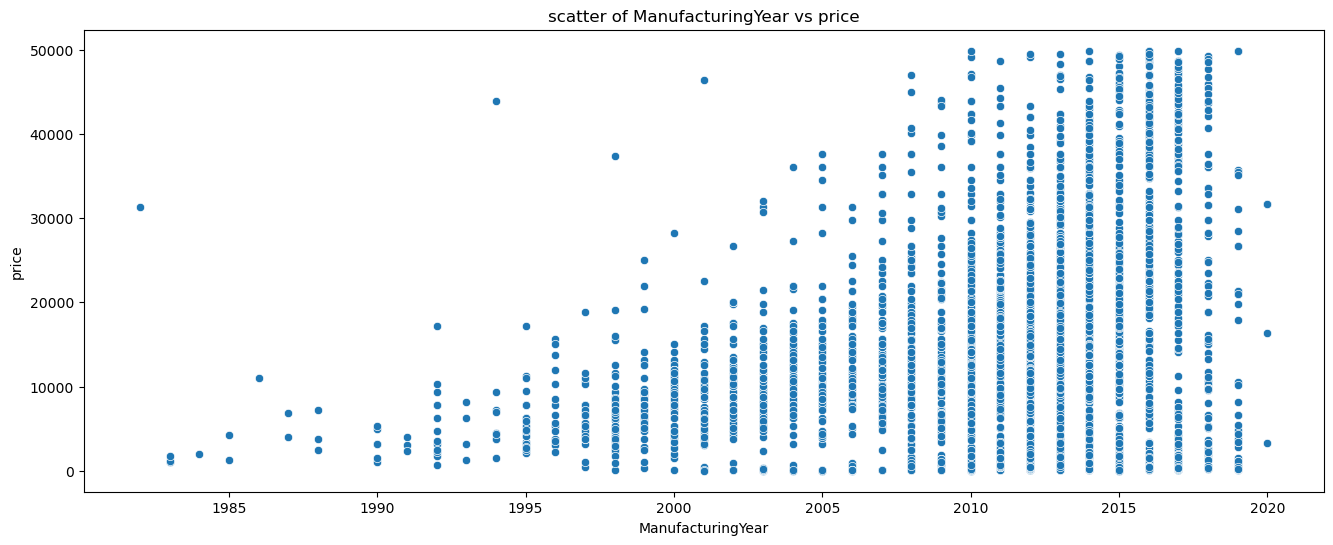

Correlation between ManufacturingYear and price: 0.27


In [835]:
numerical_vs_numerical('ManufacturingYear','price',df)

#### Note 
- The scatter plot depicts the relationship between Manufacturing Year and Price of vehicles.
- It shows a weak positive correlation (correlation coefficient = 0.27), indicating that newer cars (higher manufacturing years) tend to have higher prices

#### Note

c:\Users\nemoh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 7329 (\N{GEORGIAN MTAVRULI CAPITAL LETTER SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\nemoh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 7342 (\N{GEORGIAN MTAVRULI CAPITAL LETTER XAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\nemoh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 7317 (\N{GEORGIAN MTAVRULI CAPITAL LETTER VIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\nemoh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 7312 (\N{GEORGIAN MTAVRULI CAPITAL LETTER AN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


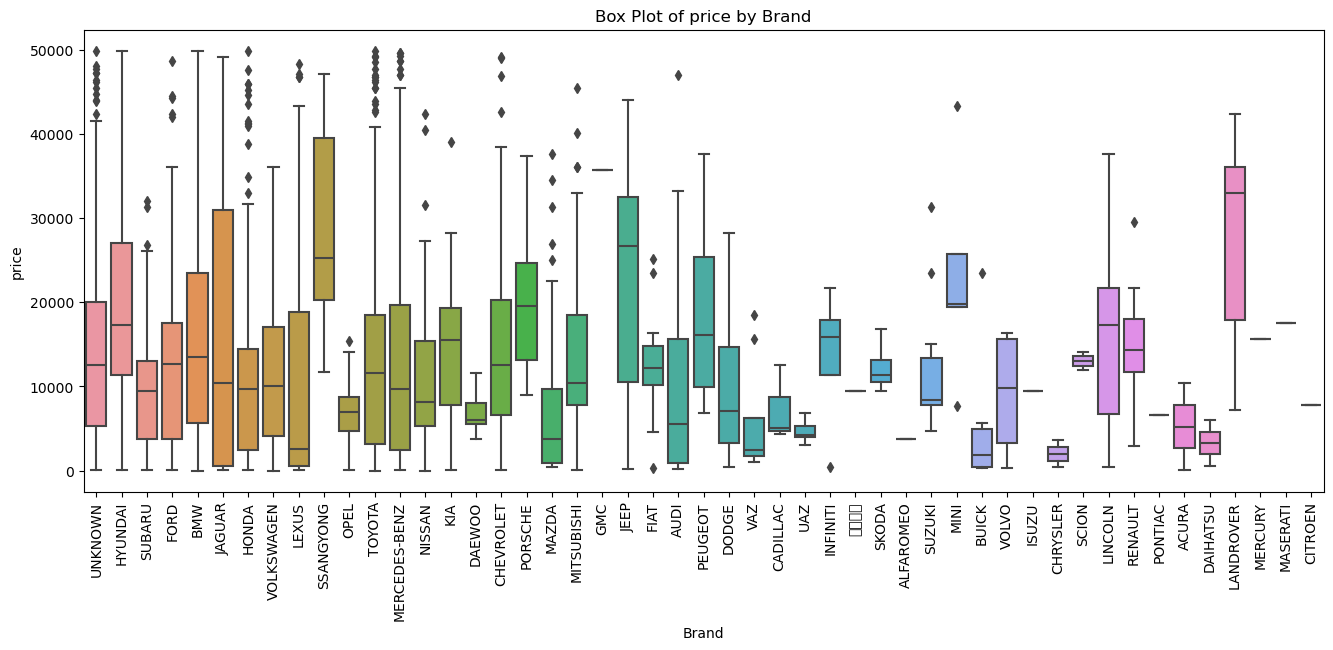

In [834]:
numerical_vs_categorical('Brand','price',df)

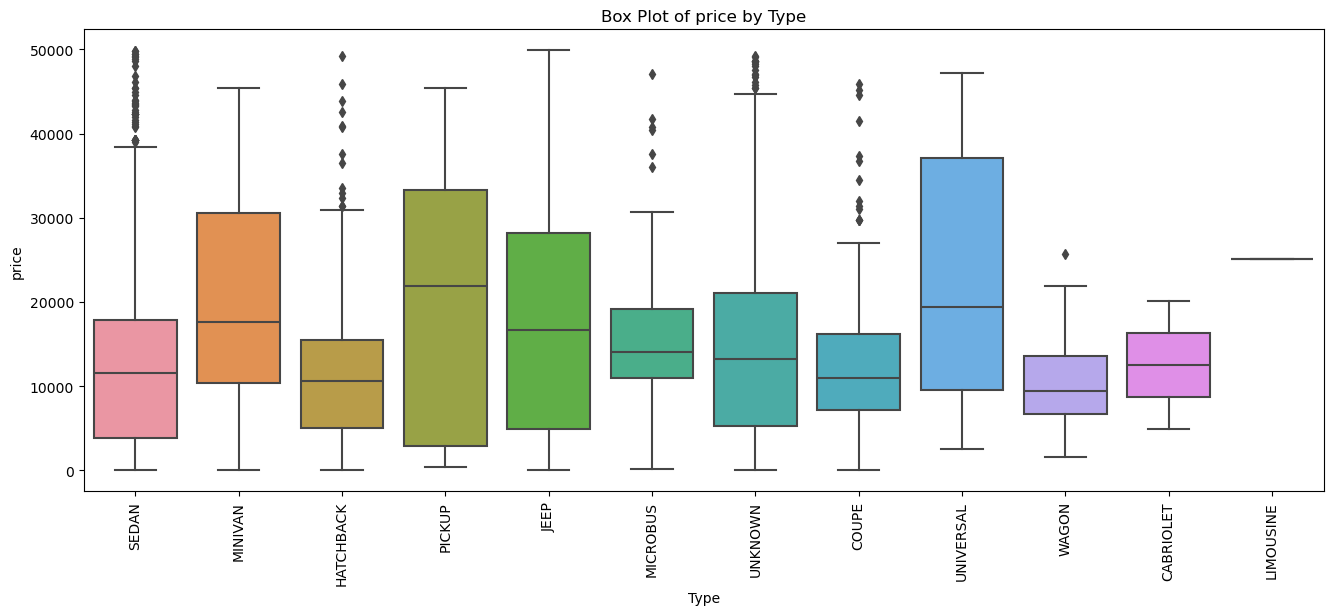

In [843]:
numerical_vs_categorical('Type','price',df)

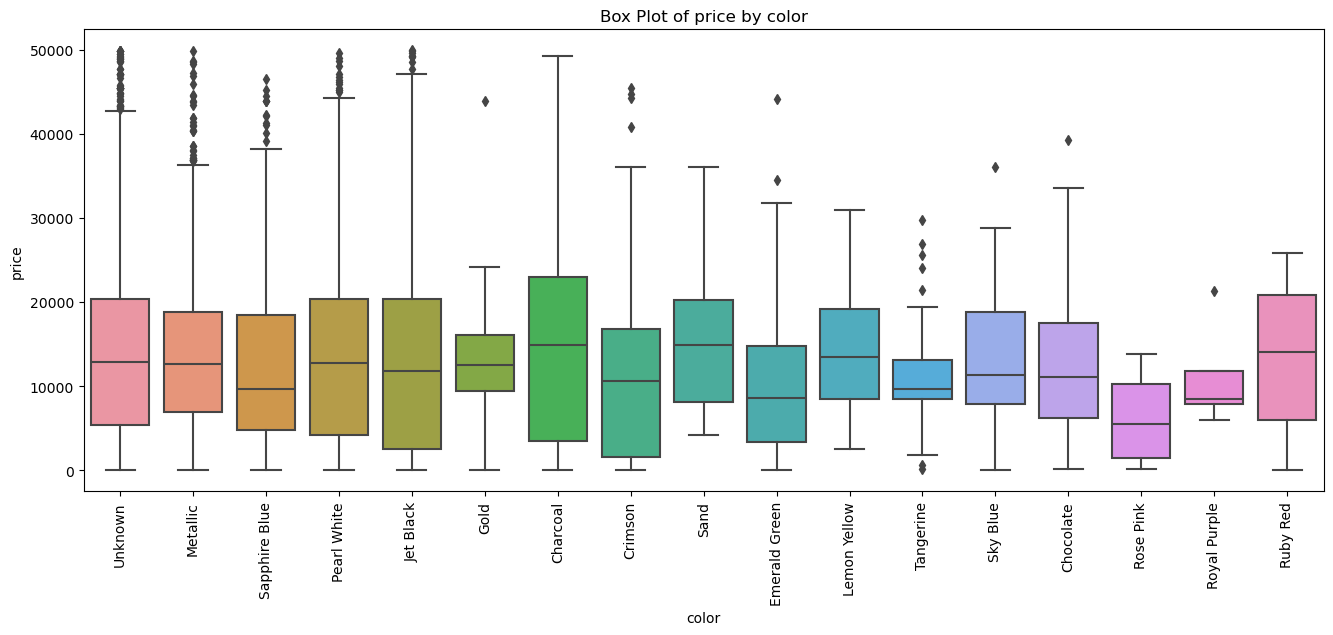

In [844]:
numerical_vs_categorical('color','price',df)

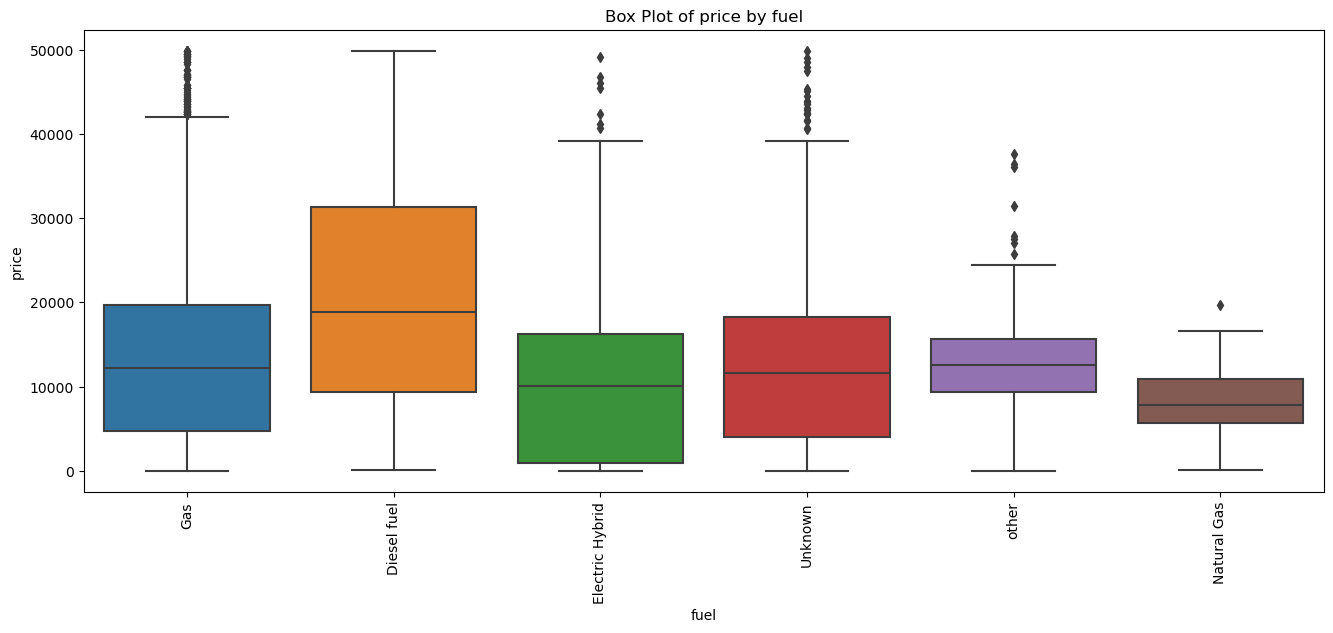

In [845]:
numerical_vs_categorical('fuel','price',df)

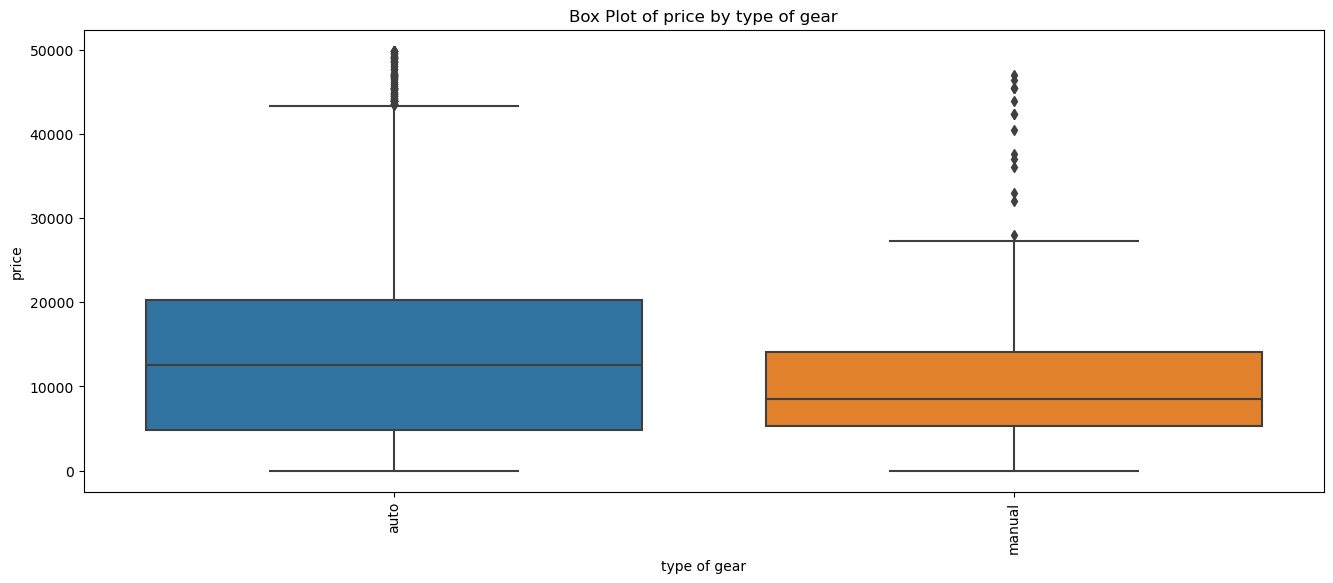

In [846]:
numerical_vs_categorical('type of gear','price',df)

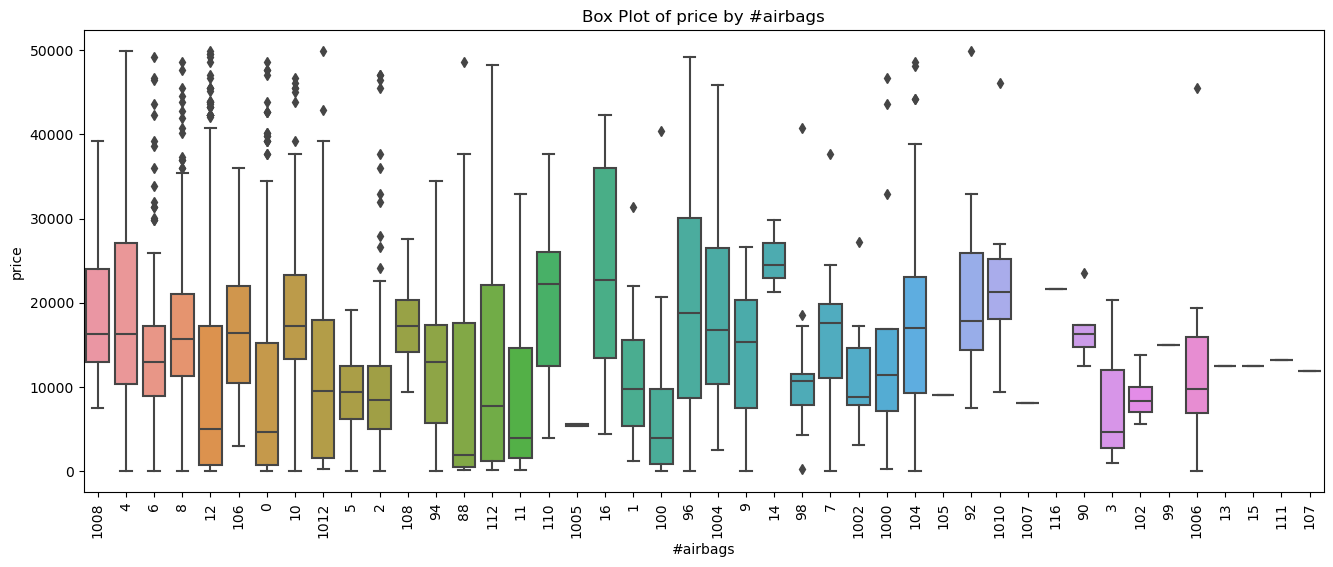

In [847]:
numerical_vs_categorical('#airbags','price',df)

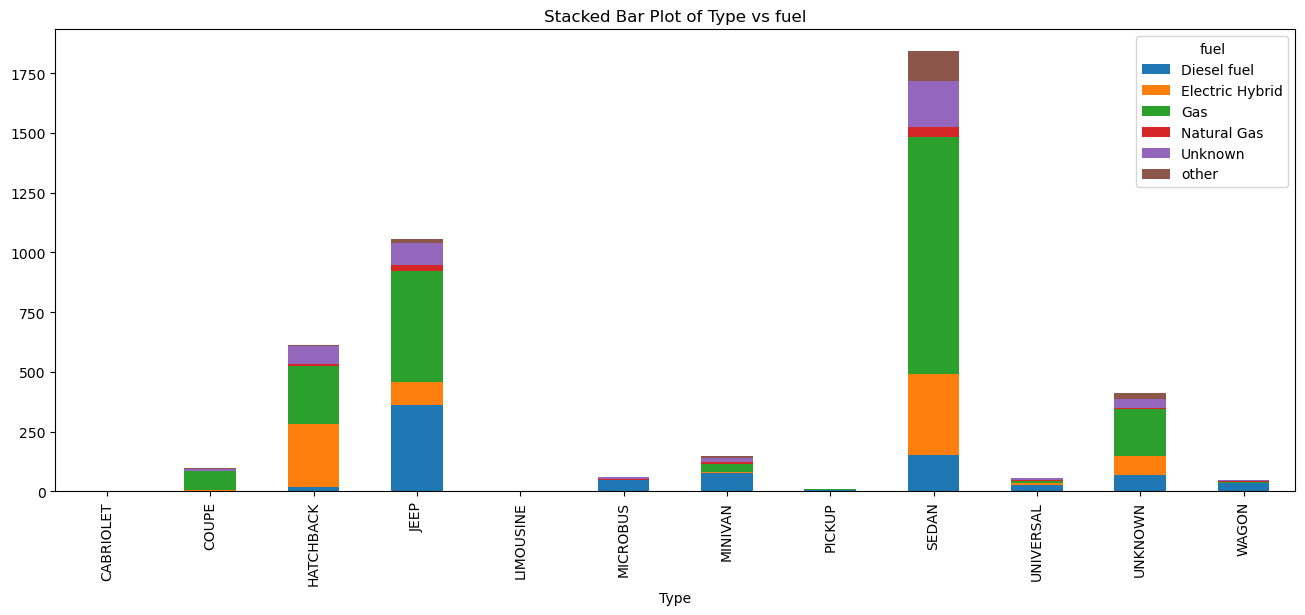

In [850]:
categorical_vs_categorical('Type','fuel',df)

c:\Users\nemoh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 7329 (\N{GEORGIAN MTAVRULI CAPITAL LETTER SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\nemoh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 7342 (\N{GEORGIAN MTAVRULI CAPITAL LETTER XAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\nemoh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 7317 (\N{GEORGIAN MTAVRULI CAPITAL LETTER VIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\nemoh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 7312 (\N{GEORGIAN MTAVRULI CAPITAL LETTER AN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


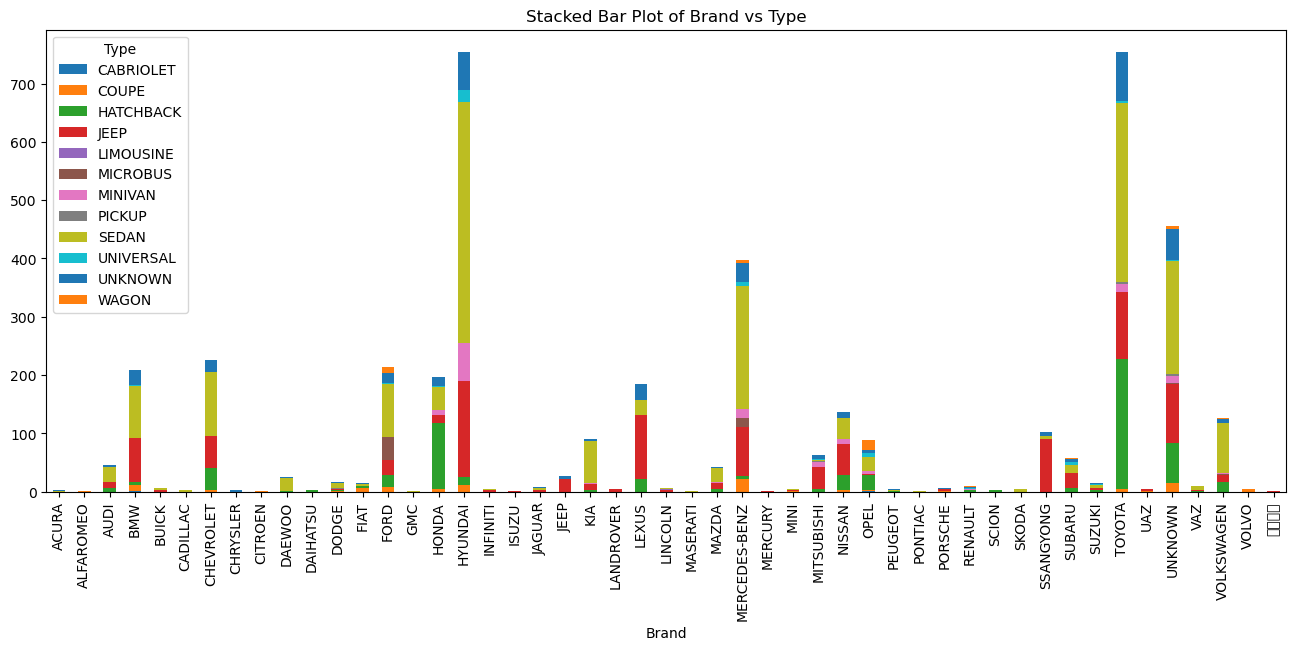

In [852]:
categorical_vs_categorical('Brand','Type',df)

# Note 
- The most common car type across all brands is sedan.
- Hyundai and Toyota are the most common car brands.

c:\Users\nemoh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 7329 (\N{GEORGIAN MTAVRULI CAPITAL LETTER SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\nemoh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 7342 (\N{GEORGIAN MTAVRULI CAPITAL LETTER XAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\nemoh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 7317 (\N{GEORGIAN MTAVRULI CAPITAL LETTER VIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\nemoh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 7312 (\N{GEORGIAN MTAVRULI CAPITAL LETTER AN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


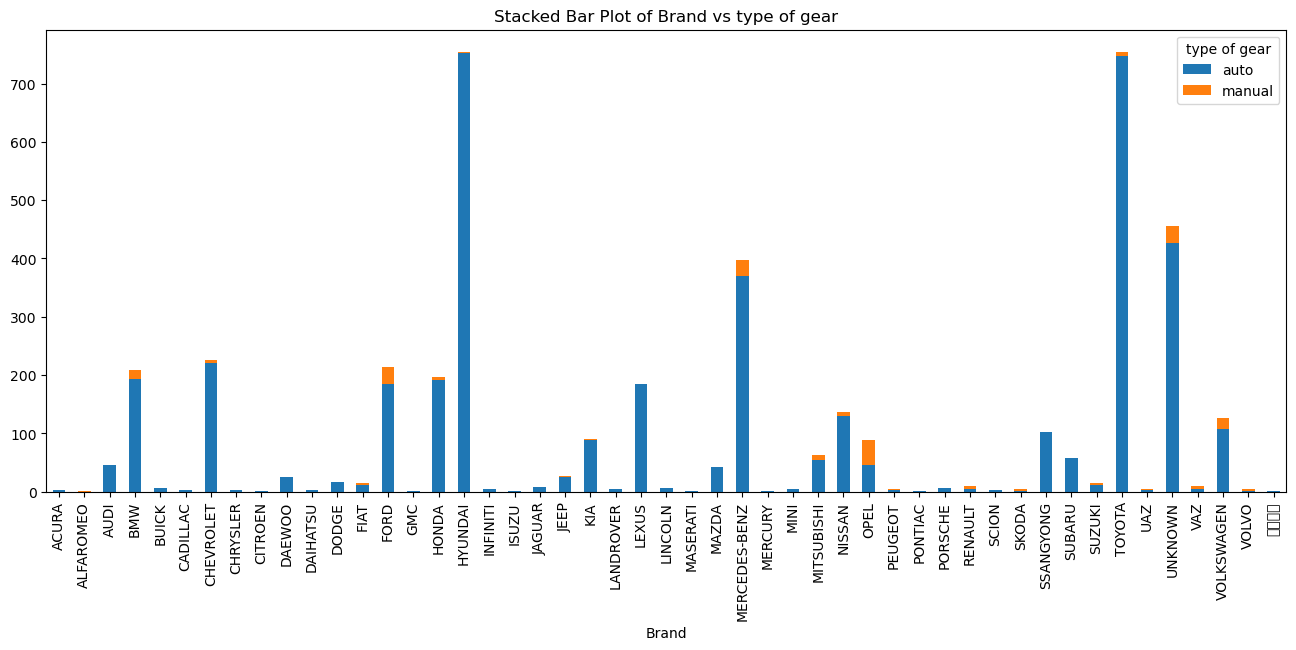

In [854]:
categorical_vs_categorical('Brand','type of gear',df)

# Note 
- Automatic gear is the most common type among car brands.